In [2]:
require(data.table)
load("cleanDataWithAttributes.RData")
load("hs.rfun")

In [5]:
hs <- function(x){
    xi <- x
    dim(xi) <- c(1, length(x))
    return(xi %*% A %*% t(xi))
}

In [10]:
X <- as.matrix(data01[, seq(1,144,by = 6), with = FALSE])
A <- as.matrix(solve(t(X) %*% X))


In [11]:
dim(X); dim(A)

[1] 1119299      24

[1] 24 24

In [50]:
hi <- apply(X, 1, hs)
Mx <- mahalanobis(X, center = apply(X, 2, mean), cov = cov(X))

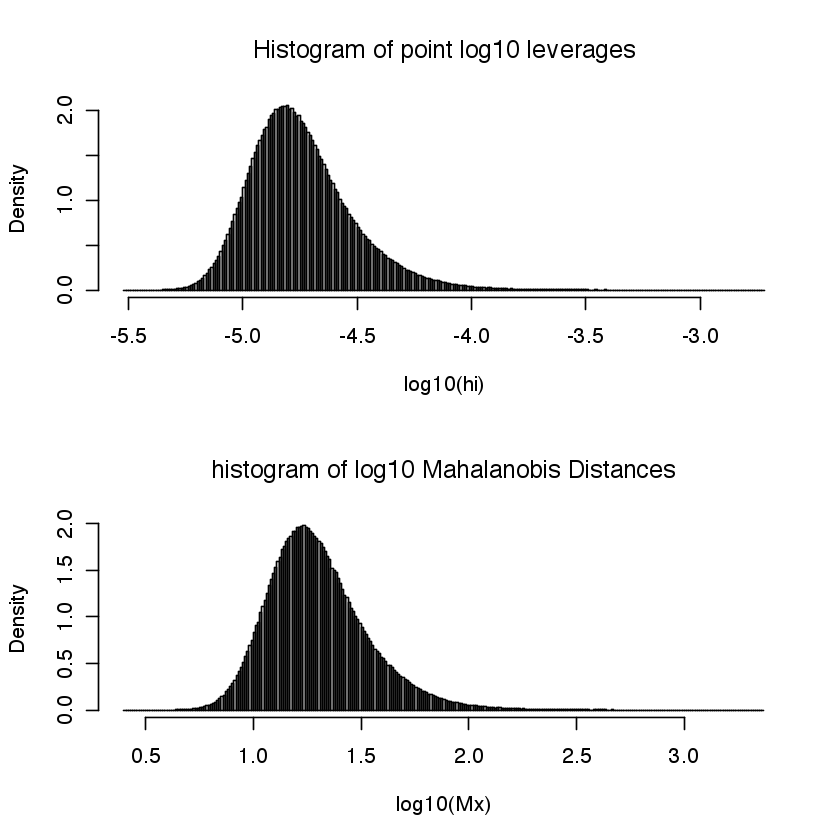

In [53]:
par(mfrow = c(2,1))
hist(log10(hi), breaks = 'Scott', prob = TRUE, main = "Histogram of point log10 leverages")
hist(log10(Mx), prob = TRUE, breaks = 'Scott', main = "histogram of log10 Mahalanobis Distances")